In [1]:
!pip install nltk

In [2]:
import nltk

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("Rail_Equipment_Accident_Incident_Data.csv", usecols = ['Primary Accident Cause'])

In [5]:
data.head

<bound method NDFrame.head of                                    Primary Accident Cause
0       Failure to comply with restricted speed or its...
1       Failure to comply with restricted speed or its...
2                                          Cars left foul
3       Shoving movement, man on or at leading end of ...
4       Shoving movement, man on or at leading end of ...
...                                                   ...
216095  Broken Rail - Detail fracture from shelling or...
216096  Wide gage (due to defective or missing crossties)
216097  Broken Rail - Transverse/compound fissure   [D...
216098  Wide gage (due to defective or missing crossties)
216099  Other way and structure defect (Provide detail...

[216100 rows x 1 columns]>

In [15]:
import nltk
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [16]:
tokens = []

stop_words = set(stopwords.words('english'))

print(stopwords)

pattern = re.compile('[\W_]+')

<WordListCorpusReader in 'C:\\Users\\rifaz\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


In [18]:
for row in data.itertuples(index=False):
    if not row[0] or pd.isnull(row[0]):
        continue
    #print(row[0])
    cleaned_text = re.sub('[^a-zA-Z0-9\s]', '', row[0])
    
    # Tokenize the first column of each row using word_tokenize from NLTK
    row_tokens = sent_tokenize(cleaned_text)
    # Filter out stopwords
    filtered_tokens = [token for token in row_tokens if token.lower() not in stop_words]
    # Append the filtered tokens to the list of tokens
    tokens += filtered_tokens

#combined = ' '.join(tokens)
#print(combined)

In [19]:
fdist = nltk.FreqDist(tokens)

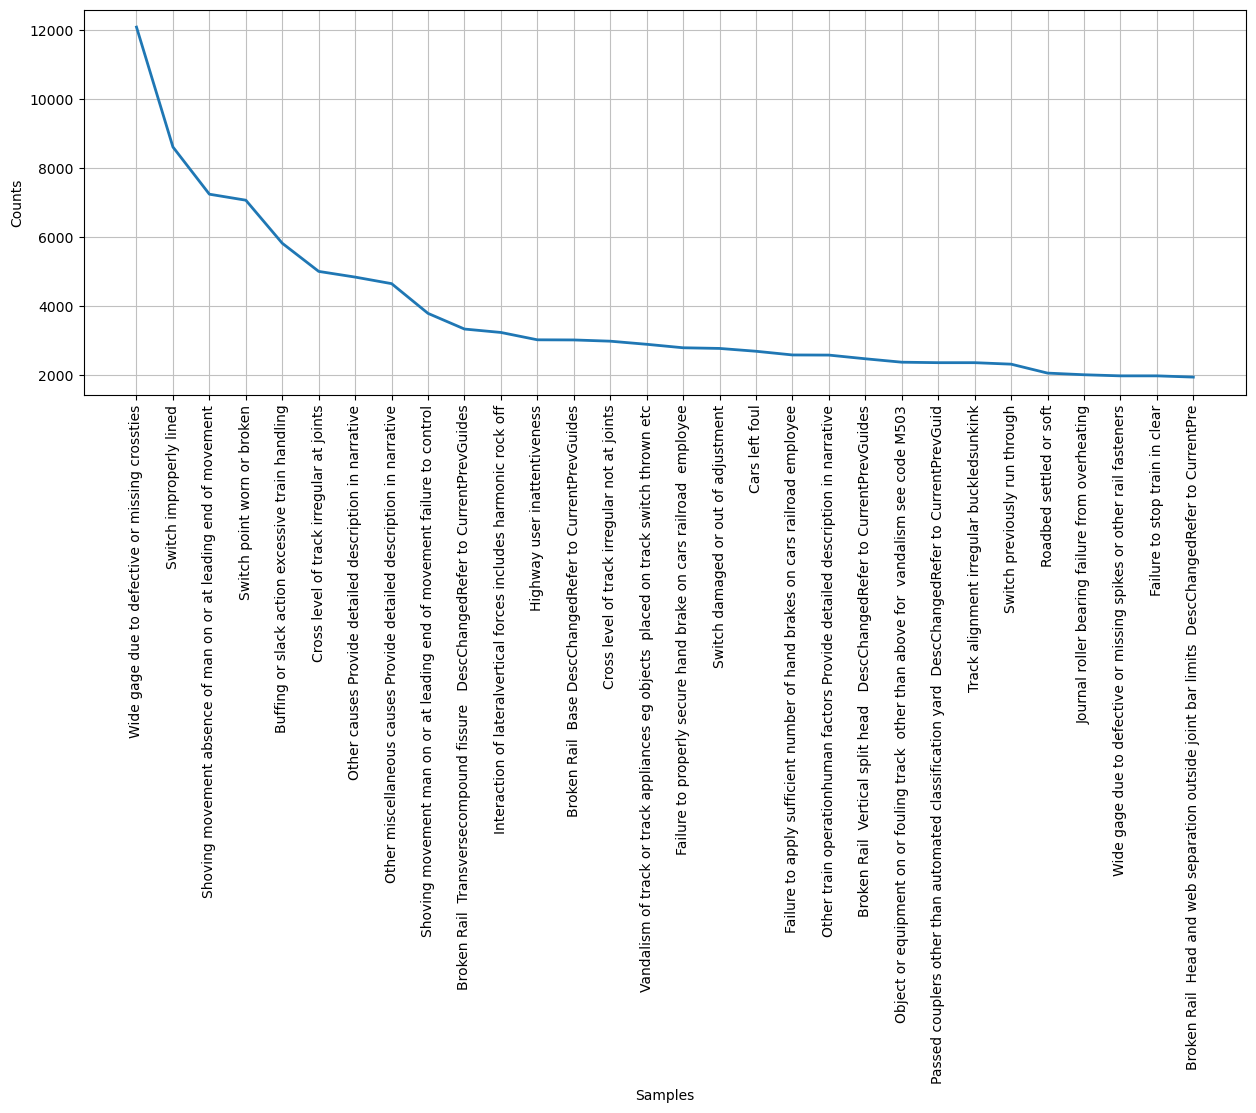

In [22]:
plt.figure(figsize=(10, 5))
fdist.plot(30, cumulative=False)
plt.show()